In [1]:
import pandas as pd
import numpy as np

Задание 1  
Напишите функцию, которая классифицирует фильмы из материалов занятия по правилам:  

оценка 2 и ниже — низкий рейтинг;  
оценка 4 и ниже — средний рейтинг;  
оценка 4.5 и 5 — высокий рейтинг.  
Результат классификации запишите в столбец class.  

In [2]:
# сохраняем данные в переменных
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
def classification(rating):
    ''' классификация фильмов по оценкам '''
    if rating <= 2:
        return 'низкий'
    elif rating <= 4:
        return 'средний'
    elif rating > 4:
        return 'высокий'
    
ratings['class'] = ratings['rating'].apply(classification)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний
1,1,1029,3.0,1260759179,средний
2,1,1061,3.0,1260759182,средний
3,1,1129,2.0,1260759185,низкий
4,1,1172,4.0,1260759205,средний


Задание 2
Используйте файл keywords.csv.  

Нужно написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определённому региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.  
Результат классификации запишите в отдельный столбец region.

In [4]:
# сохраняем данные в переменных
keywords = pd.read_csv('keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [5]:
# определим словарь с регионом и его городами
geo_data = {  
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}  

In [6]:
# изменим словарь, чтобы ключом был город, а значением регион
data_geo = {}
for k,v in geo_data.items():
    for c in v:
        data_geo[c] = k
data_geo

{'москва': 'Центр',
 'тула': 'Центр',
 'ярославль': 'Центр',
 'петербург': 'Северо-Запад',
 'псков': 'Северо-Запад',
 'мурманск': 'Северо-Запад',
 'владивосток': 'Дальний Восток',
 'сахалин': 'Дальний Восток',
 'хабаровск': 'Дальний Восток'}

In [7]:
# в новый столбец запишем регион, если соответствующий город 
# есть в строке поискового запроса
def make_region(str_):
    'определение региона по наличию города в запросе'
    for k, v in data_geo.items():
        if k in str_:
            return v
        else:
            pass
        
keywords['region'] = keywords.keyword.apply(make_region)

In [19]:
# пустые строки в новом столбце заполним словом undefined
keywords.fillna({'region': 'undefined'}, inplace=True)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [9]:
# проверим, например, Дальний Восток
keywords[keywords.region == 'Дальний Восток']

,keyword,shows,region
1063,фарпост владивосток,176951,Дальний Восток
2175,дром хабаровск,98361,Дальний Восток
3206,дром владивосток,73084,Дальний Восток
3275,100 сп владивосток,76418,Дальний Восток
3687,авито хабаровск,63736,Дальний Восток
...,...,...,...
90402,аэропорт владивосток,4658,Дальний Восток
92442,монастырев владивосток официальный сайт,3870,Дальний Восток
92843,проститутки хабаровск,4120,Дальний Восток
93872,биглион хабаровск,3890,Дальний Восток


Задание 3 (бонусное)  

Есть мнение, что раньше снимали настоящее кино, не то что сейчас. Ваша задача — проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия: файл movies.csv и ratings.csv из базы. Нужно проверить, верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.  
Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга.

In [10]:
# сохраняем данные в переменных
movies = pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [11]:
# создадим список с годами согласно условию
years = np.arange(1950,2011)
years

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010])

In [12]:
# в новый столбец добавим поле с годами из названия фильма
def production_year(name_film):
    for year in years:
        if str(year) in name_film:
            return str(year)
        
movies['year'] = movies.title.apply(production_year).fillna('1900')

In [13]:
# посчитаем среднюю оценку на каждый фильм
ratings_mean = ratings.groupby('movieId').rating.mean().reset_index()

In [14]:
# объединим данные с фильмами со средними оценками
ratings_year = movies.merge(ratings_mean, on='movieId', how='left')
ratings_year.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857
...,...,...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,1900,3.000000
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,1900,NaN
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,1900,5.000000
9123,164977,The Gay Desperado (1936),Comedy,1900,NaN


In [18]:
# посчитаем средние оценки за каждый год
mean_ratings_year = ratings_year.groupby('year').rating.mean()
# и посмотрим в каких годах были самые высокие среднии оценки
mean_ratings_year.sort_values(ascending=False).head(10)

year
1951    3.906653
1952    3.802318
1962    3.772962
1953    3.738878
1957    3.693322
1973    3.688212
1971    3.643227
1969    3.604509
1972    3.585295
1958    3.571956
Name: rating, dtype: float64

<Axes: xlabel='year'>

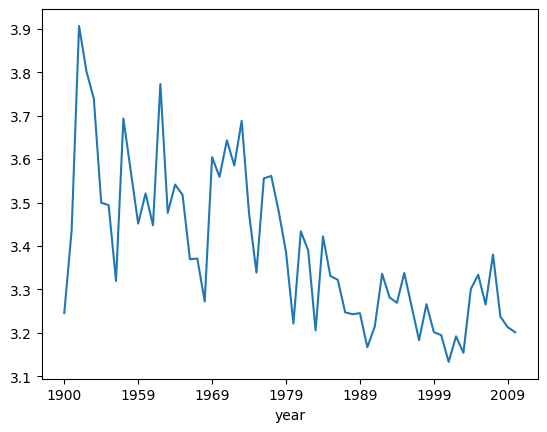

In [17]:
# и визуализируем
mean_ratings_year.sort_index().plot()

Похоже действительно, постепенно средний рейтинг фильмов падает